In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv('mouse_viral_study.csv')
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [4]:
df.shape

(400, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [12]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


In [18]:
df.skew()

Med_1_mL        -0.011422
Med_2_mL         0.004315
Virus Present    0.000000
dtype: float64

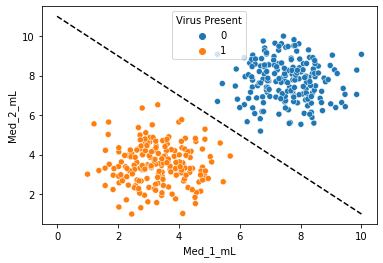

In [4]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)
m=-1
x=np.linspace(0,10,100)
c=11
y=m*x+c
plt.plot(x,y,'k--')
plt.show()

In [5]:
x=df.drop('Virus Present',axis=1)
y=df['Virus Present']

In [6]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1000)
model.fit(x,y)

SVC(C=1000, kernel='linear')

In [9]:
# CODE SOURCE IS DIRECTLY FROM DOCUMENTATION
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

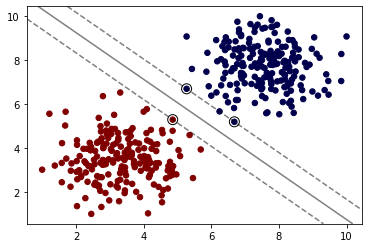

In [13]:
plot_svm_boundary(model,x,y)

In [17]:
model=SVC(kernel='linear',C=0.05)
model.fit(x,y)

SVC(C=0.05, kernel='linear')

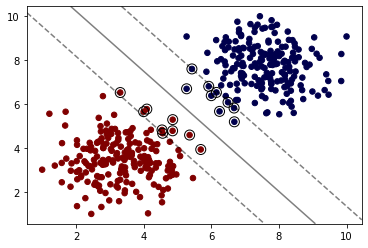

In [20]:
plot_svm_boundary(model,x,y)

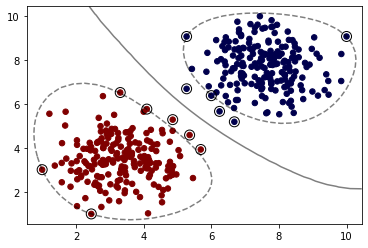

In [49]:
model=SVC(kernel='rbf',C=1)
model.fit(x,y)
plot_svm_boundary(model,x,y)

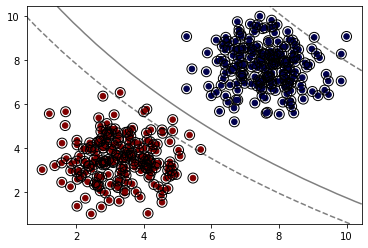

In [26]:
model=SVC(kernel='sigmoid')
model.fit(x,y)
plot_svm_boundary(model,x,y)

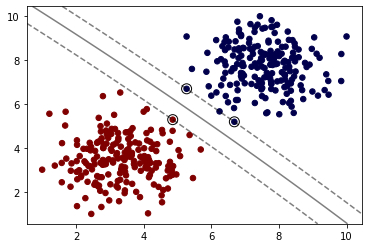

In [39]:
model=SVC(kernel='poly',C=1,degree=2)
model.fit(x,y)
plot_svm_boundary(model,x,y)

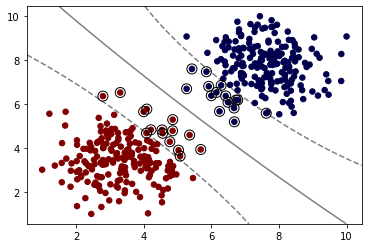

In [41]:
model=SVC(kernel='rbf',C=1,gamma=0.01)
model.fit(x,y)
plot_svm_boundary(model,x,y)

In [46]:
from sklearn.model_selection import GridSearchCV
svm=SVC()
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid=GridSearchCV(svm,param_grid)
grid.fit(x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [47]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [51]:
grid.best_score_

1.0